In [ ]:
import matplotlib.pyplot as plt

def plot(columns):
    column_labels = ['X', 'Y', 'Z', 'Roll', 'Pitch', 'Yaw']
    y_axis = ['Position[m]', 'Angle[rad]']
    
    # Create a 2x3 grid for all six plots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
    
    for i, column in enumerate(columns):
        axes[i].plot(column, marker='o', linestyle='-', markersize=1, label=column_labels[i])
        axes[i].set_title(f'Plot of {column_labels[i]}')
        axes[i].set_xlabel('Package number')
        axes[i].set_ylabel(y_axis[i // 3])  # Use 'Position[m]' for first 3, 'Angle[rad]' for last 3
        axes[i].legend()
        axes[i].grid(True)
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    
def get_time(data):
    m = 0
    s = 0
    ms_prev = -1

    start_ms = data[1].iloc[0]

    for ms in data[1]:
        ms = ms - start_ms
        if ms < ms_prev:
            s += 1
            if s >= 60:
                s = 0
                m += 1
        ms_prev = ms
    time_s = m * 60 + s + ms / 1000
    return float(time_s)


In [93]:
import pandas as pd
from pathlib import Path
import os

base_path = Path(os.getcwd()).parent

test_turnoff_path = ["RosBags\\PIDV1.csv",
                     "RosBags\\PIDV2.csv",
                     "RosBags\\PIDV3.csv"]

test_turnoff = [[] for _ in range(len(test_turnoff_path))]
for i, test_path in enumerate(test_turnoff_path):
    test_path = base_path / test_path
    data = pd.read_csv(test_path)

    for j in range(8):
        test_turnoff[i].append(data[f'/Vicon/data[{j}]'].dropna())

total_packages = len(test_turnoff[0][0])
time_s = get_time(test_turnoff[0])

package_s = time_s / total_packages


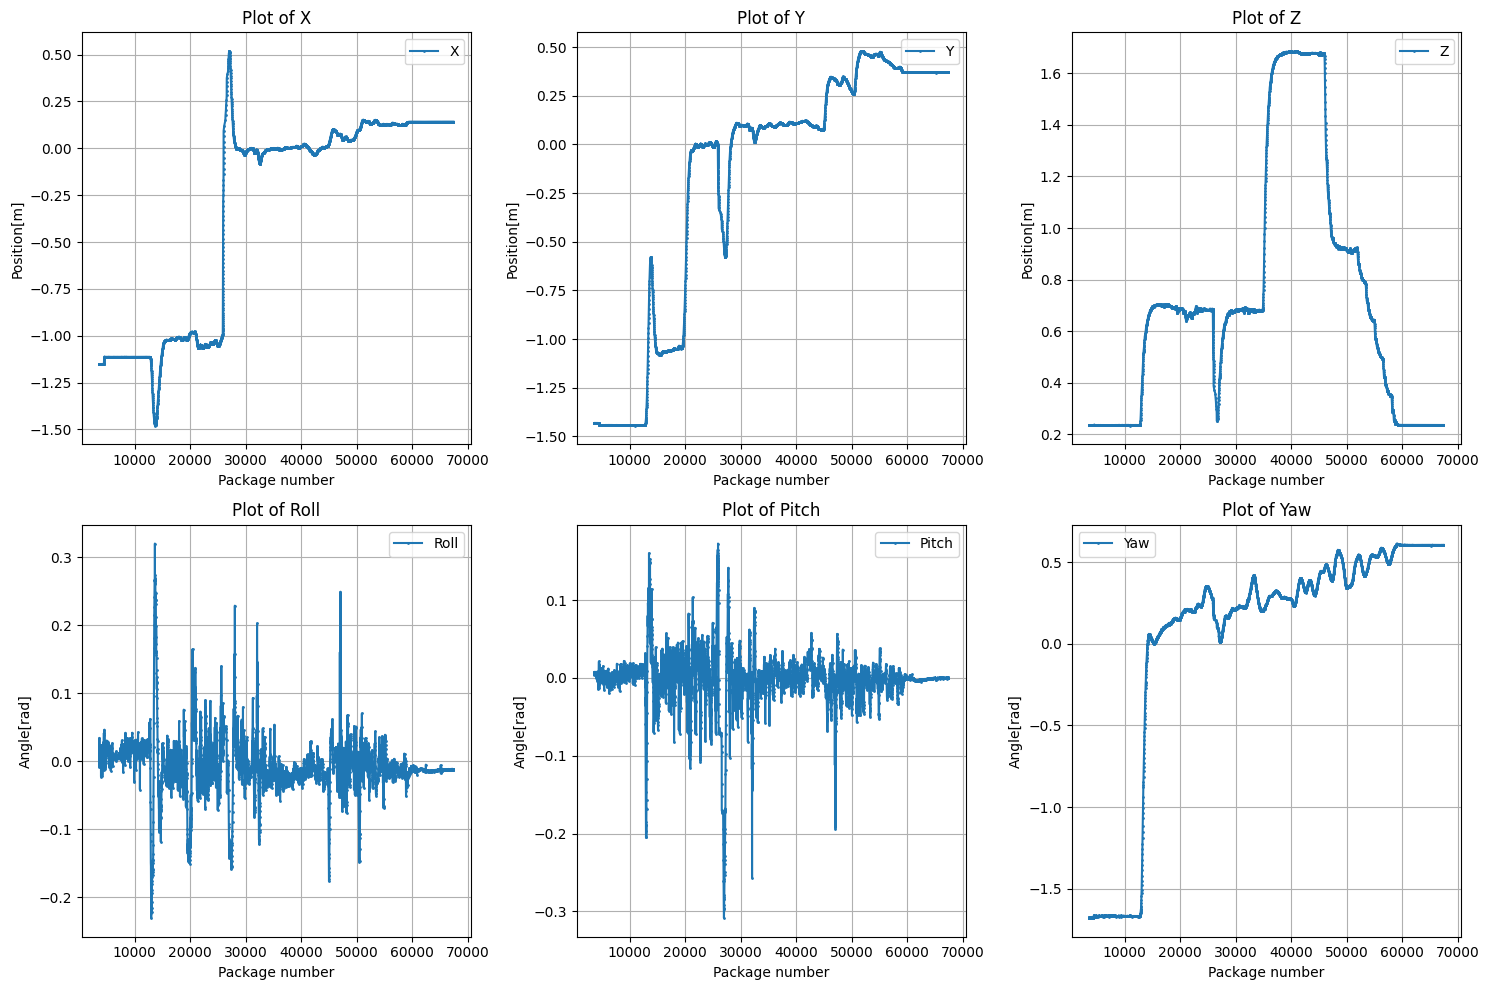

In [100]:
plot(test_turnoff[0][2:])

